In [2]:
# analiza actiunii NIO

import yfinance as yf

nio = yf.Ticker('NIO')
print(nio)

yfinance.Ticker object <NIO>


In [4]:
nio.info

{'address1': 'Building 20',
 'address2': 'No. 56 AnTuo Road Anting Town Jiading District',
 'city': 'Shanghai',
 'zip': '201804',
 'country': 'China',
 'website': 'https://www.nio.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. It offers five and six-seater electric SUVs, as well as smart electric sedans. The company also offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Power Charger and Destination Charger; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service. In addition, it provides re

In [6]:
nio.calendar

{'Dividend Date': datetime.date(2016, 5, 2),
 'Earnings Date': [datetime.date(2025, 3, 3), datetime.date(2025, 3, 7)],
 'Earnings High': -1.85,
 'Earnings Low': -2.626,
 'Earnings Average': -2.2215,
 'Revenue High': 20561000000,
 'Revenue Low': 20051100000,
 'Revenue Average': 20209219680}

Informații de bază despre acțiune:
            Key                  Value
0      address1     One Apple Park Way
1          city              Cupertino
2         state                     CA
3           zip                  95014
4       country          United States
5         phone         (408) 996-1010
6       website  https://www.apple.com
7      industry   Consumer Electronics
8   industryKey   consumer-electronics
9  industryDisp   Consumer Electronics


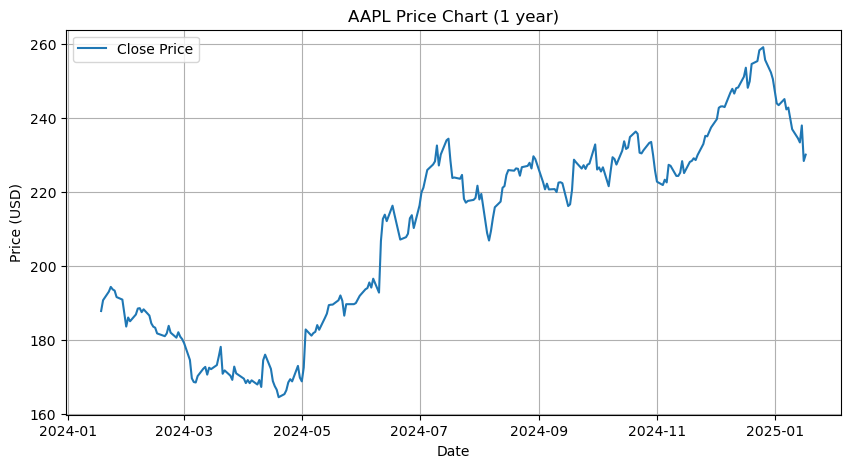

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funcție care preia și organizează informațiile despre o acțiune
def display_stock_info(ticker_symbol):
    # Preluare date
    stock = yf.Ticker(ticker_symbol)
    info = stock.info

    # Organizarea informațiilor într-un DataFrame pentru o afișare mai structurată
    info_df = pd.DataFrame(list(info.items()), columns=['Key', 'Value'])
    
    # Afișarea primelor 10 rânduri ca exemplu
    print("Informații de bază despre acțiune:")
    print(info_df.head(10))
    
    # Afișarea unui grafic cu date istorice (preț de închidere)
    hist = stock.history(period="1y")
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, hist['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Price Chart (1 year)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplu de utilizare pentru Apple
display_stock_info('AAPL')


Informații de bază despre acțiune:
            Key                                           Value
0      address1                                     Building 20
1      address2  No. 56 AnTuo Road Anting Town Jiading District
2          city                                        Shanghai
3           zip                                          201804
4       country                                           China
5       website                             https://www.nio.com
6      industry                              Auto Manufacturers
7   industryKey                              auto-manufacturers
8  industryDisp                              Auto Manufacturers
9        sector                               Consumer Cyclical


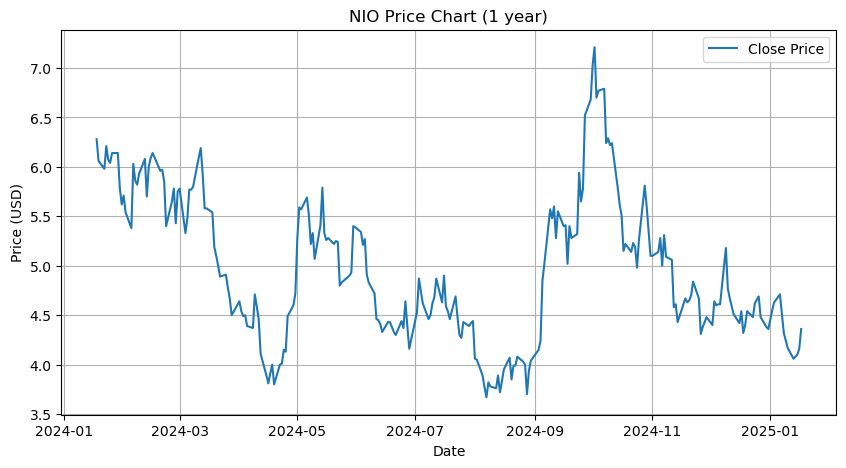

In [10]:
display_stock_info("NIO")

In [12]:
nio.top_holdings

AttributeError: 'Ticker' object has no attribute 'top_holdings'

Informații de bază despre acțiune:
            Key                  Value
0      address1     One Apple Park Way
1          city              Cupertino
2         state                     CA
3           zip                  95014
4       country          United States
5         phone         (408) 996-1010
6       website  https://www.apple.com
7      industry   Consumer Electronics
8   industryKey   consumer-electronics
9  industryDisp   Consumer Electronics


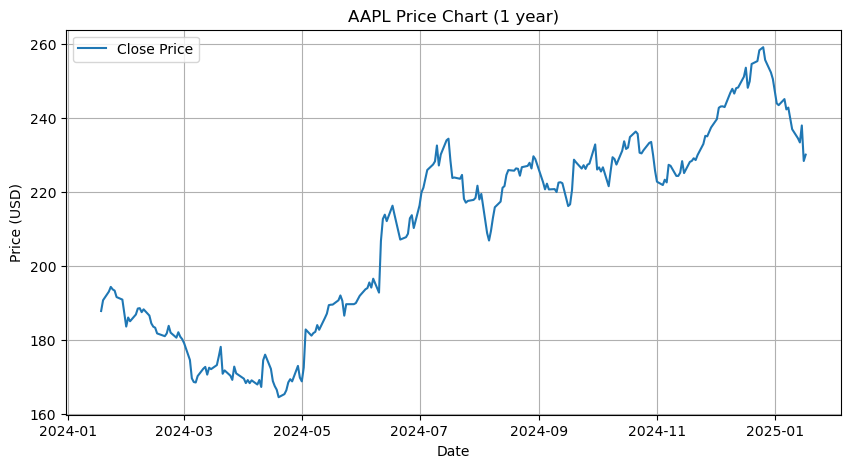

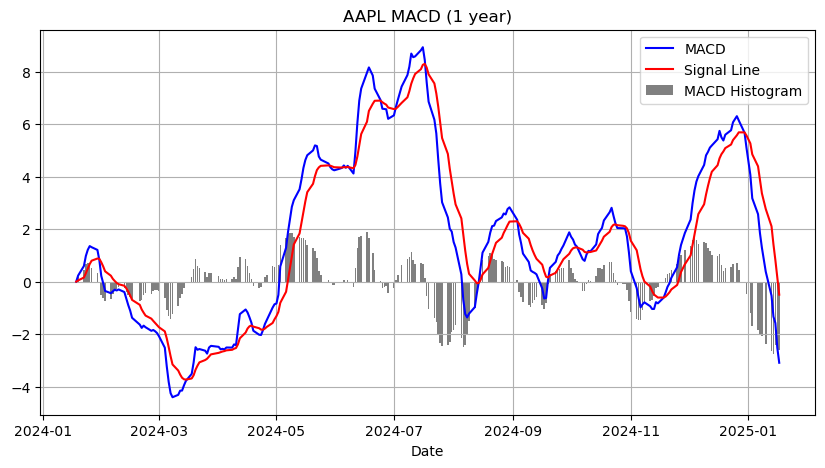

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funcție pentru calculul MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculul EMA pentru perioada scurtă și lungă
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculul MACD (diferența dintre EMA scurt și lung)
    macd = short_ema - long_ema

    # Calculul liniei de semnal (EMA pentru MACD)
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()

    # Calculul histogramului MACD (MACD - linia de semnal)
    macd_histogram = macd - signal_line

    return macd, signal_line, macd_histogram

# Funcție care preia și organizează informațiile despre o acțiune
def display_stock_info(ticker_symbol):
    # Preluare date
    stock = yf.Ticker(ticker_symbol)
    info = stock.info

    # Organizarea informațiilor într-un DataFrame pentru o afișare mai structurată
    info_df = pd.DataFrame(list(info.items()), columns=['Key', 'Value'])
    
    # Afișarea primelor 10 rânduri ca exemplu
    print("Informații de bază despre acțiune:")
    print(info_df.head(10))
    
    # Afișarea unui grafic cu date istorice (preț de închidere)
    hist = stock.history(period="1y")

    # Calculul MACD
    macd, signal_line, macd_histogram = calculate_macd(hist)

    # Graficul prețului acțiunii
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, hist['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Price Chart (1 year)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficul MACD
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, macd, label='MACD', color='blue')
    plt.plot(hist.index, signal_line, label='Signal Line', color='red')
    plt.bar(hist.index, macd_histogram, label='MACD Histogram', color='gray')
    plt.title(f'{ticker_symbol} MACD (1 year)')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplu de utilizare pentru Apple
display_stock_info('AAPL')


Informații de bază despre acțiune:
            Key                  Value
0      address1     One Apple Park Way
1          city              Cupertino
2         state                     CA
3           zip                  95014
4       country          United States
5         phone         (408) 996-1010
6       website  https://www.apple.com
7      industry   Consumer Electronics
8   industryKey   consumer-electronics
9  industryDisp   Consumer Electronics


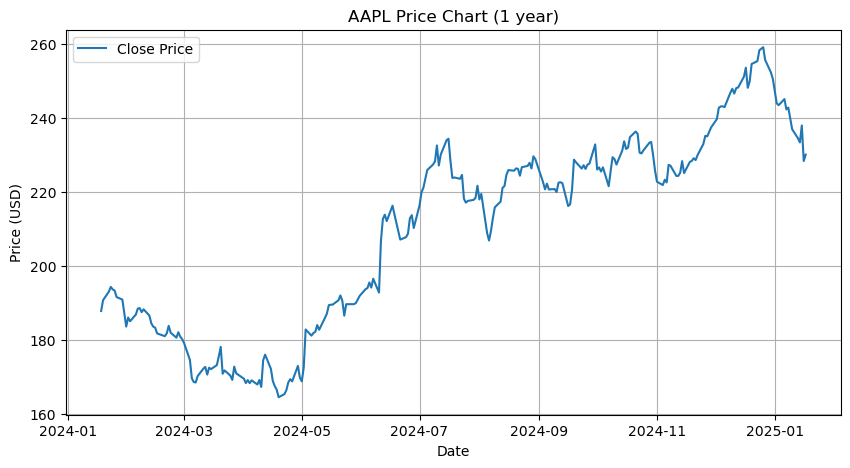

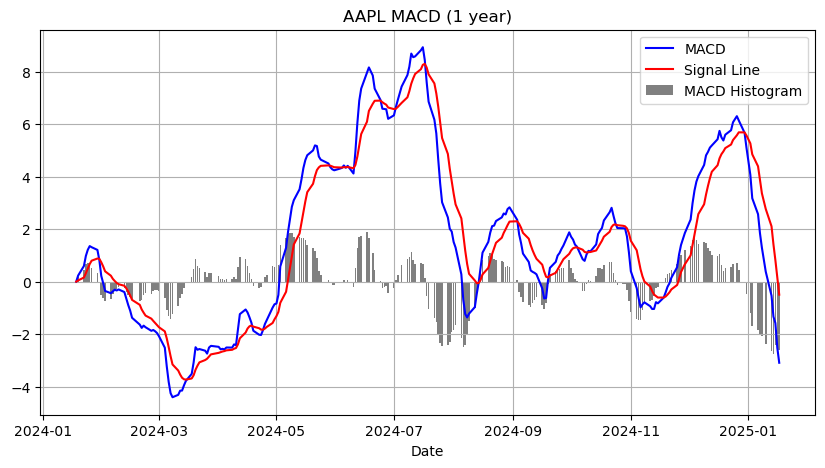

PDF salvat: AAPL_report.pdf


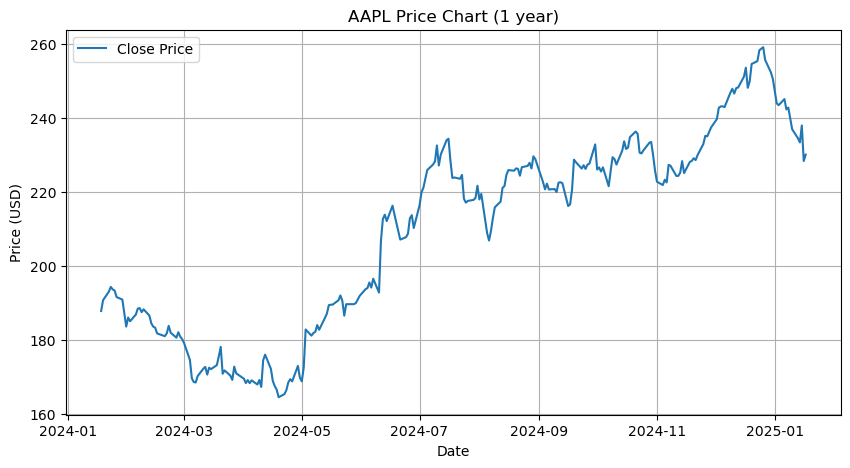

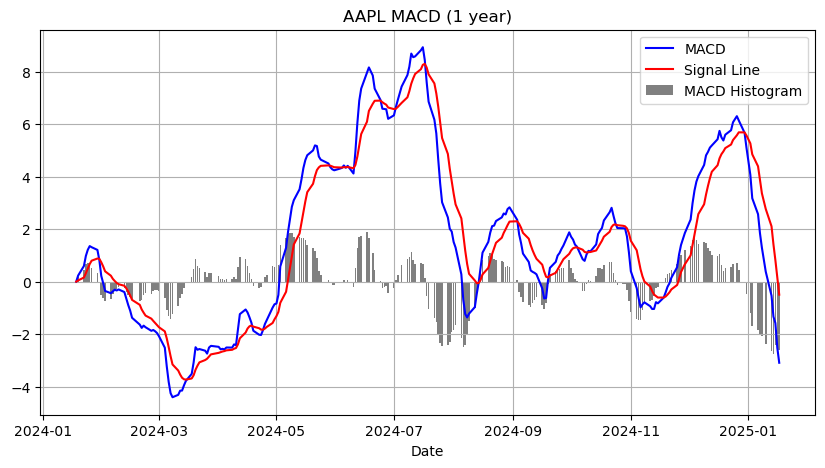

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import os

# Funcție pentru calculul MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

# Funcție pentru salvarea graficelor într-un PDF
def save_pdf(ticker_symbol, info_df, hist, macd, signal_line, macd_histogram):
    # Creare PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Titlu
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(200, 10, f'Stock Report: {ticker_symbol}', ln=True, align='C')

    # Informații generale despre acțiune
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(200, 10, 'General Information', ln=True)
    
    # Adăugare informații din DataFrame
    pdf.set_font('Arial', '', 10)
    for i in range(min(10, len(info_df))):
        key = info_df['Key'].iloc[i]
        value = info_df['Value'].iloc[i]
        pdf.cell(200, 10, f'{key}: {value}', ln=True)

    # Salvarea și includerea graficelor în PDF
    # Graficul prețului
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, hist['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Price Chart (1 year)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    price_chart = f'{ticker_symbol}_price_chart.png'
    plt.savefig(price_chart)  # Salvare grafic preț

    pdf.add_page()
    pdf.image(price_chart, x=10, y=50, w=180)
    os.remove(price_chart)  # Ștergerea imaginii după adăugare

    # Graficul MACD
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, macd, label='MACD', color='blue')
    plt.plot(hist.index, signal_line, label='Signal Line', color='red')
    plt.bar(hist.index, macd_histogram, label='MACD Histogram', color='gray')
    plt.title(f'{ticker_symbol} MACD (1 year)')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    macd_chart = f'{ticker_symbol}_macd_chart.png'
    plt.savefig(macd_chart)  # Salvare grafic MACD

    pdf.add_page()
    pdf.image(macd_chart, x=10, y=50, w=180)
    os.remove(macd_chart)  # Ștergerea imaginii după adăugare

    # Salvarea fișierului PDF
    pdf_output = f'{ticker_symbol}_report.pdf'
    pdf.output(pdf_output)
    print(f"PDF salvat: {pdf_output}")

# Funcție care preia și organizează informațiile despre o acțiune
def display_stock_info(ticker_symbol):
    # Preluare date
    stock = yf.Ticker(ticker_symbol)
    info = stock.info

    # Organizarea informațiilor într-un DataFrame pentru o afișare mai structurată
    info_df = pd.DataFrame(list(info.items()), columns=['Key', 'Value'])
    
    # Afișarea primelor 10 rânduri ca exemplu
    print("Informații de bază despre acțiune:")
    print(info_df.head(10))
    
    # Afișarea unui grafic cu date istorice (preț de închidere)
    hist = stock.history(period="1y")

    # Calculul MACD
    macd, signal_line, macd_histogram = calculate_macd(hist)

    # Graficul prețului acțiunii
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, hist['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Price Chart (1 year)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficul MACD
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, macd, label='MACD', color='blue')
    plt.plot(hist.index, signal_line, label='Signal Line', color='red')
    plt.bar(hist.index, macd_histogram, label='MACD Histogram', color='gray')
    plt.title(f'{ticker_symbol} MACD (1 year)')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Salvarea datelor și graficelor într-un PDF
    save_pdf(ticker_symbol, info_df, hist, macd, signal_line, macd_histogram)

# Exemplu de utilizare pentru Apple
display_stock_info('AAPL')


In [18]:
from fpdf import FPDF

# Funcție pentru salvarea unui cod într-un fișier PDF
def save_code_to_pdf(file_name, code_text):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Setare font și dimensiune pentru cod
    pdf.set_font("Arial", size=12)

    # Adăugare linie cu linie din cod
    for line in code_text.split('\n'):
        pdf.multi_cell(0, 10, line)

    # Salvare fișier PDF
    pdf_output = f"{file_name}.pdf"
    pdf.output(pdf_output)
    print(f"Codul a fost salvat în {pdf_output}")

# Exemplu de cod de salvat
example_code = '''
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram
'''

# Salvare cod în PDF
save_code_to_pdf("example_code", example_code)


Codul a fost salvat în example_code.pdf


In [23]:
from fpdf import FPDF

# Funcție pentru salvarea conținutului unui fișier într-un PDF
def save_file_to_pdf(input_file, output_pdf):
    # Creare PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Citirea conținutului fișierului
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Adăugare fiecare linie în PDF
    for line in lines:
        pdf.multi_cell(0, 10, line)  # Scrierea fiecărei linii în PDF

    # Salvare fișier PDF
    pdf.output(output_pdf)
    print(f"Fișierul PDF a fost salvat: {output_pdf}")

# Exemplu de utilizare
input_file = 'NIO20Ian25.ipynb'  # Specifică calea către fișierul pe care dorești să-l salvezi
output_pdf = 'NIO20Ian25.pdf'  # Calea fișierului PDF care va fi creat
save_file_to_pdf(input_file, output_pdf)


UnicodeEncodeError: 'latin-1' codec can't encode character '\u021b' in position 577: ordinal not in range(256)

In [25]:
from fpdf import FPDF

# Funcție pentru salvarea conținutului unui fișier într-un PDF, cu suport UTF-8
def save_file_to_pdf(input_file, output_pdf):
    # Creare PDF
    pdf = FPDF()
    pdf.add_page()

    # Adăugare font TTF care suportă caractere Unicode
    pdf.add_font("DejaVu", "", "DejaVuSans.ttf", uni=True)  # Asigură-te că ai fontul "DejaVuSans.ttf" în același folder
    pdf.set_font("DejaVu", size=12)

    # Citirea conținutului fișierului
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Adăugare fiecare linie în PDF
    for line in lines:
        pdf.multi_cell(0, 10, line)

    # Salvare fișier PDF
    pdf.output(output_pdf)
    print(f"Fișierul PDF a fost salvat: {output_pdf}")

# Exemplu de utilizare
input_file = 'NIO20Ian25.ipynb'  # Specifică calea către fișierul pe care dorești să-l salvezi
output_pdf = 'exemplu.pdf'  # Calea fișierului PDF care va fi creat
save_file_to_pdf(input_file, output_pdf)


RuntimeError: TTF Font file not found: DejaVuSans.ttf